In [189]:
## Preliminaries
#Show plots in the notebook
%matplotlib inline

from sklearn import datasets, preprocessing, cross_validation, feature_extraction
from sklearn import  cluster
from sklearn.linear_model import LogisticRegression

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib2

from matplotlib.colors import ListedColormap
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification, make_regression, make_blobs, make_checkerboard, make_multilabel_classification
from sklearn import preprocessing

from sknn.mlp import Regressor, Classifier, Layer

import random
import math

import scipy.optimize as opt
from numpy import where, zeros


In [190]:
h = .02  # step size in the mesh
sample_size = 500

# Moon Data
X, y = make_moons(n_samples = sample_size, noise=0.3, random_state=0)
moons = (X,y)

# Circles Data
X, y =  make_circles(n_samples = sample_size, noise=0.2, factor=0.5, random_state=1)
circles = (X,y)

# Classification Data
X, y = make_classification(n_samples = sample_size, n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)


rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

# Classification Data very separated 
X, y = make_classification(n_samples = sample_size, n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1, class_sep=5)


rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
very_linearly_separable = (X, y)


# Clusters Data
X, y = make_blobs(n_samples=sample_size, n_features=2, centers=3, cluster_std=0.5,
                    random_state=1)
clusters = (X,y)

nn = Regressor(
    layers=[
        Layer("Rectifier", units=100),
        Layer("Linear")],
        learning_rate=0.02,
        n_iter=10)

logReg = LogisticRegression(C=1e5)

kmeans = cluster.KMeans(n_clusters=3, init='random', random_state=20160217)

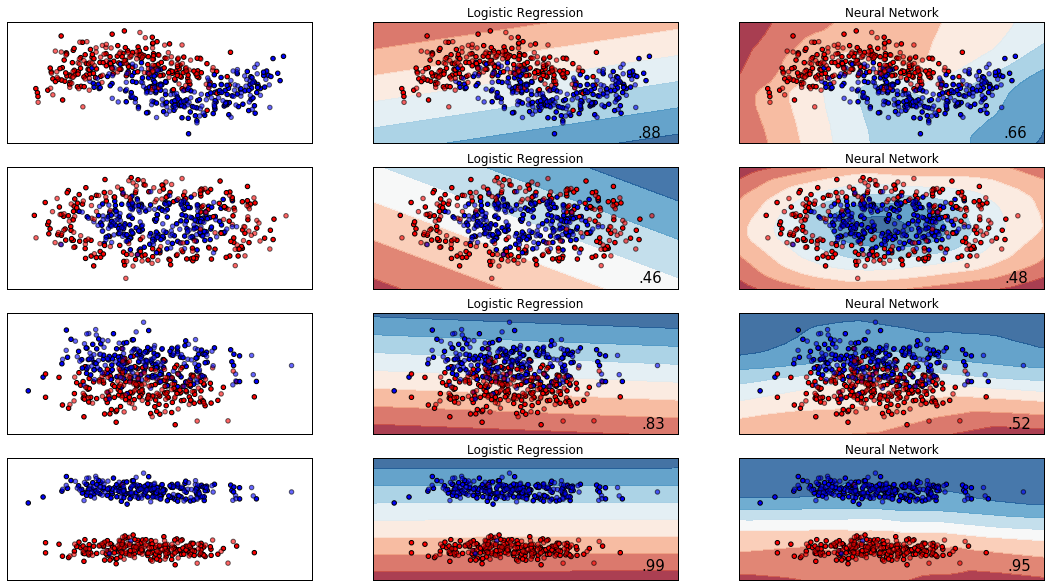

In [191]:
names = ["Logistic Regression", "Neural Network", "MyLog"]

classifiers = [logReg,
               nn,
               
              ]
datasets = [moons, circles, linearly_separable, very_linearly_separable]

figure = plt.figure(figsize=(15, 10))
i = 1
# Iterate over the datasets
for ds in datasets:

    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=20160202)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
  
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])

    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)

    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1
    
    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        
        if (name == 'MyLog'):
            clf.fit(X_train, y_train)
            score = clf.score(X_test, y_test) 
        else:
            clf.fit(X_train, y_train)
            score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, m_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

        # Put the result into a color plot
        Z = Z.reshape(xx.shape) 
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

figure.subplots_adjust(left=.02, right=.98)
plt.show()

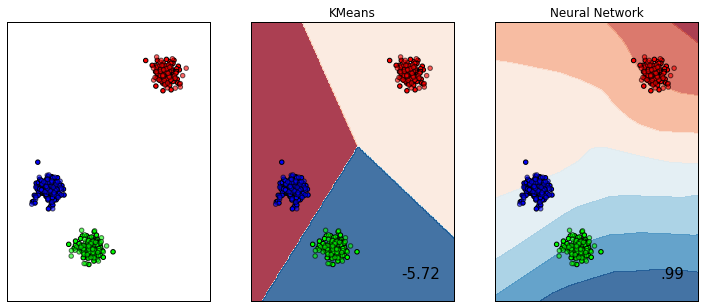

In [192]:
names = ["KMeans", "Neural Network"]
classifiers = [kmeans, nn]
datasets = [clusters]

figure = plt.figure(figsize=(10, 5))
i = 1
# Iterate over the datasets
for ds in datasets:

    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=20160202)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    
    cm_bright = ListedColormap(['#FF0000', '#0000FF', '#00FF00'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)

    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1
    
    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, m_max]x[y_min, y_max].
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

figure.subplots_adjust(left=.02, right=.98)
plt.show()

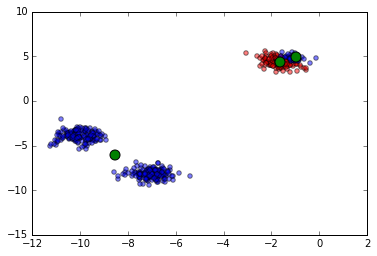

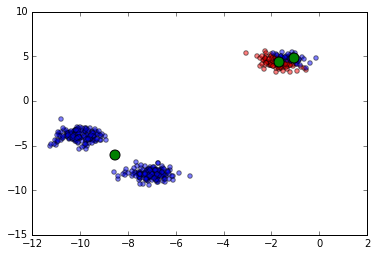

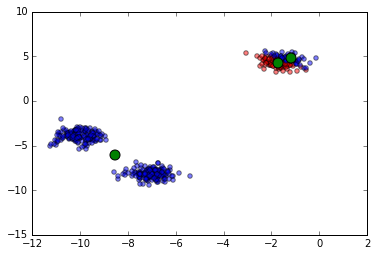

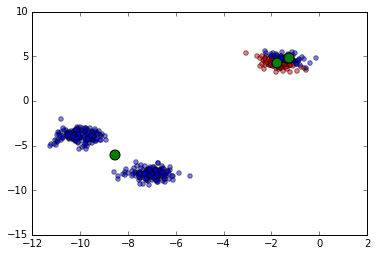

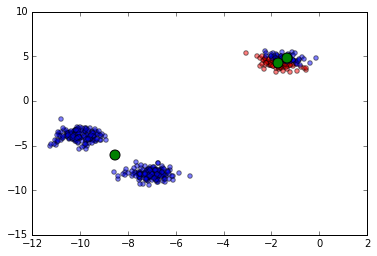

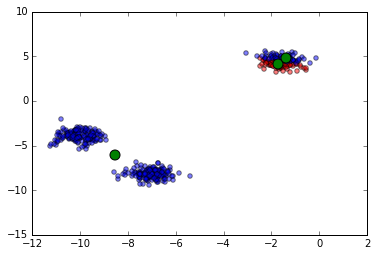

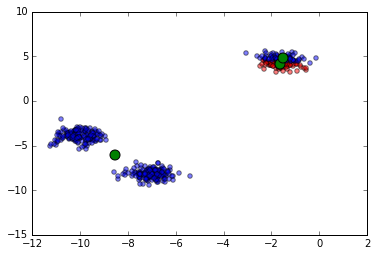

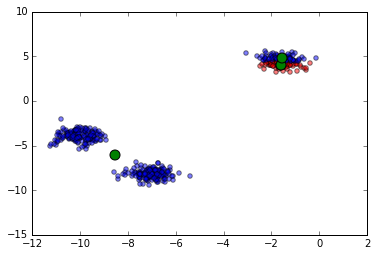

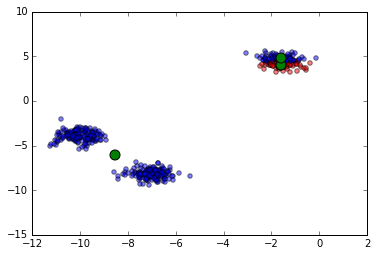

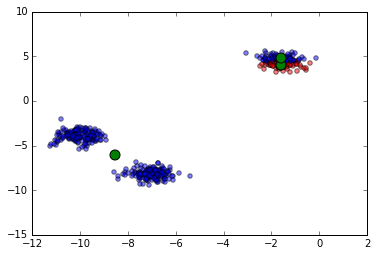

In [201]:
# Implementing KMeans

# 1. sample_centroids

def sample_centroids(k, data):
    data_clean = data
    indexes = random.sample(data.index, k)
    centroids = data.iloc[indexes]
    return [centroids, indexes]



# 2. find_closest_centroid
def find_closest_centroid(centroids, data):
    data_values = data.values
    inst_cent_map = []
    
    for row in range(0, len(data_values)):
        centroid_distances = []
    
        for centroid in range(0, len(centroids)):
            distance = 0
            cent = centroids[centroid]
            
            for col in range(0, len(data_values[0])):
                x = cent[col]
                y = data_values[row][col]
                distance += (x - y)**2    

            distance = math.sqrt(distance)
            centroid_distances.append(distance)            
        closest_centroid = centroid_distances.index(min(centroid_distances))
        inst_cent_map.append([data_values[row], centroids[closest_centroid], closest_centroid])
    return inst_cent_map

# 3. update_centroid
def update_centroid(instances_centroid_map, k_means):
    new_centroids = []
    for i in range(0, k_means): 
        same_centroid_instances = []
        
        added_initial_centroid = 0
        for instance in range(0, len(instances_centroid_map)):
            instance_features = instances_centroid_map[instance][0]
            centroid_points = instances_centroid_map[instance][1]
            centroid_group = instances_centroid_map[instance][2]
            
            if (centroid_group == i):
                if (added_initial_centroid != 1):
                    same_centroid_instances.append(centroid_points)
                    added_initial_centroid = 1
                same_centroid_instances.append(instance_features)
                
        new_centroid = []
        if (len(same_centroid_instances) > 0):
            for feature in range(0, len(same_centroid_instances[0])):
                feature_total = 0
                total_instances = len(same_centroid_instances)

                for inst in range(0, total_instances):
                    instance = same_centroid_instances[inst]    
                    feature_total += instance[feature]

                new_centroid.append(round(feature_total / total_instances, 4))

            new_centroids.append([new_centroid, total_instances])
    return new_centroids


[data, targets]  = make_blobs(n_samples=sample_size, n_features=2, centers=3, cluster_std=0.5,
                    random_state=1)

data = pd.DataFrame(data)
targets = pd.DataFrame(targets)


def k_means():
    # Sample centroids
    data_clean = data
    k_means = 3
    [centroids, indexes] = sample_centroids(k_means, data)
    
    # init total_instances
    total_instances = []
    for i in range(0, k_means):
        total_instances.append(1)
    
    data_clean.drop(data_clean.index[indexes], inplace=True)
    centroids = centroids.values
    
    centroid_updated = 1;
    while (centroid_updated == 1):

        centroid_updated = 0
        
        instances_centroids_map = find_closest_centroid(centroids, data_clean)
        
        old_centroids = centroids
        centroids_info = update_centroid(instances_centroids_map, k_means)
        centroids = []
        
        new_total_instances = []
        for i in range(0, len(centroids_info)):
            centroids.append(centroids_info[i][0])
            new_total_instances.append(centroids_info[i][1])
        
        if total_instances == new_total_instances:
            centroid_updated = 0
            centroids = old_centroids
        else:
            centroid_updated = 1
            total_instances = new_total_instances
        
        x_points_red = []
        y_points_red = []
                    
        x_points_blue = []
        y_points_blue = []
        
        x_centroids = []
        y_centroids = []
        
        instances_centroids_map = find_closest_centroid(centroids, data_clean)
        for inst in range(0, len(instances_centroids_map)):
            instance = instances_centroids_map[inst][0]
            
            if (centroids[0] == instances_centroids_map[inst][1]):
                x_points_red.append(instance[0])
                y_points_red.append(instance[1])
            else:
                x_points_blue.append(instance[0])
                y_points_blue.append(instance[1])
            
        for cent in range(0, len(centroids)):
            x_centroids.append(centroids[cent][0])
            y_centroids.append(centroids[cent][1])

        plt.scatter(x_points_red, y_points_red, c='r', alpha=0.5)
        plt.scatter(x_points_blue, y_points_blue, c='b', alpha=0.5)
        
        plt.scatter(x_centroids, y_centroids, c='g', s=100)
        plt.show()
        
    return [centroids, data]

[centroids, data] = k_means()

Accuracy: 84.600000


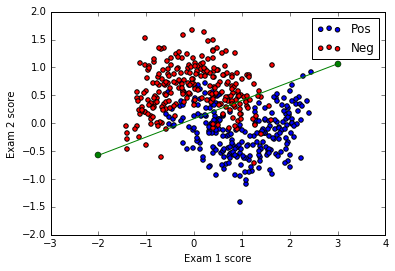

Accuracy: 50.200000


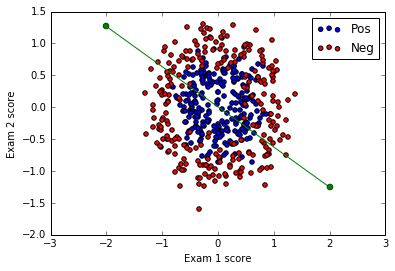

Accuracy: 83.000000


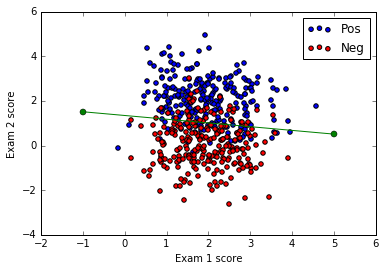

Accuracy: 99.200000


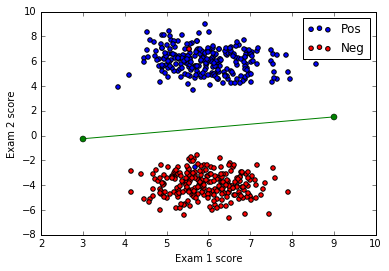

In [207]:
def sigmoid(X):
    return 1 / (1 + np.exp(- X))

def cost(theta, X, y):
    p_1 = sigmoid(np.dot(X, theta)) # predicted probability of label 1
    log_l = (-y)*np.log(p_1) - (1-y)*np.log(1-p_1) # log-likelihood vector

    return log_l.mean()

def grad(theta, X, y):
    p_1 = sigmoid(np.dot(X, theta))
    error = p_1 - y # difference between label and prediction
    grad = np.dot(error, X_1) / y.size # gradient vector
    return grad

datasets = [moons, circles, linearly_separable, very_linearly_separable]

i = 1
# Iterate over the datasets
for ds in range(0, len(datasets)):
    X, y = datasets[ds]
    
    x_pos = X[where(y == 1),0]
    y_pos = X[where(y == 1),1]

    x_neg = X[where(y == 0),0]
    y_neg = X[where(y == 0),1]


    # prefix an extra column of ones to the feature matrix (for intercept term)
    theta = 0.1* np.random.randn(3)
    X_1 = np.append(np.ones((X.shape[0], 1)), X, axis=1)

    theta_1 = opt.fmin_bfgs(cost, theta, fprime=grad, args=(X_1, y), disp=0)

    w1 = theta_1[1]
    w2 = theta_1[2]

    raw = []
    h = []
    for i in range(0, X.shape[0]):
        intercept = theta_1[0]
        w1 = theta_1[1]
        w2 = theta_1[2]

        f1 = X[i][0]
        f2 = X[i][1]

        point = intercept + (w1 * f1) + (w2 * f2)
        raw.append(point)
        result = sigmoid(point)

        h.append(result)

    p = []

    for it in range(0, len(h)):
        if h[it] > 0.5:
            p.append(1)
        else:
            p.append(0)

    scatter(x_pos, y_pos, c='b')
    scatter(x_neg, y_neg, c='r')
    xlabel('Exam 1 score')
    ylabel('Exam 2 score')
    legend(['Pos', 'Neg'])

    
    x1 = 0
    x2 = 0
    p1 = 0
    p2 = 0
    y_intercept = theta_1[0]
    w1 = theta_1[1]
    w2 = theta_1[2]
    if (ds == 0):
        x1 = -2
        x2 = 3
    elif ds == 1:
        x1 = -2
        x2 = 2
    elif ds == 2:
        x1 = -1
        x2 = 5
    else:
        x1 = 3
        x2 = 9
    
    p1 = (-(y_intercept) + -(x1 * w1)) / w2
    p2 = (-(y_intercept) + -(x2 * w1)) / w2     


    xs = [x1, x2]
    series1 = [p1, p2]

    plt.plot(xs, series1, linestyle='-', marker='o', c = 'g')

    accuracy = (y[where(p == y)].size / float(y.size)) * 100.0
    print 'Accuracy: %f' % accuracy
    show()
    

Accuracy: 84.600000


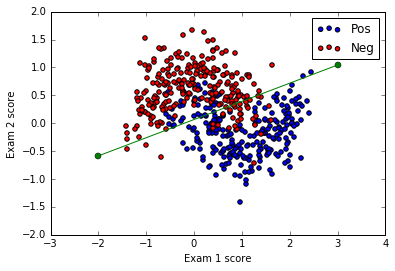

Accuracy: 50.400000


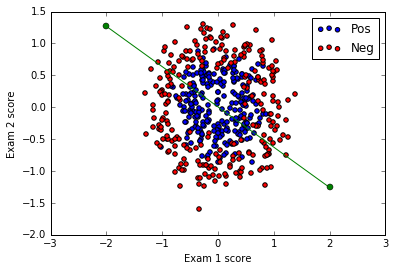

Accuracy: 83.200000


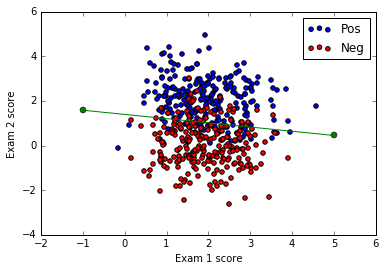

Accuracy: 99.200000


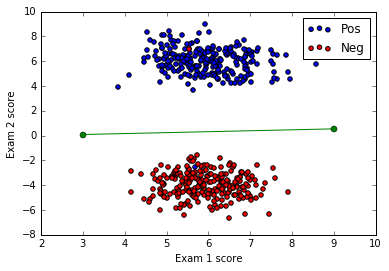

In [208]:
def sigmoid(X):
    return 1 / (1 + np.exp(- X))

def cost(theta, X, y):
    p_1 = sigmoid(np.dot(X, theta)) # predicted probability of label 1
    
    linear = (p_1 - y) ** 2
    return linear.mean()

def grad(theta, X, y):
    p_1 = sigmoid(np.dot(X, theta))
    error = p_1 - y # difference between label and prediction
    grad = np.dot(error, X_1) / y.size # gradient vector
    return grad

datasets = [moons, circles, linearly_separable, very_linearly_separable]

i = 1
# Iterate over the datasets
for ds in range(0, len(datasets)):
    X, y = datasets[ds]
    
    x_pos = X[where(y == 1),0]
    y_pos = X[where(y == 1),1]

    x_neg = X[where(y == 0),0]
    y_neg = X[where(y == 0),1]


    # prefix an extra column of ones to the feature matrix (for intercept term)
    theta = 0.1* np.random.randn(3)
    X_1 = np.append(np.ones((X.shape[0], 1)), X, axis=1)

    theta_1 = opt.fmin_bfgs(cost, theta, fprime=grad, args=(X_1, y), disp=0)

    w1 = theta_1[1]
    w2 = theta_1[2]

    raw = []
    h = []
    for i in range(0, X.shape[0]):
        intercept = theta_1[0]
        w1 = theta_1[1]
        w2 = theta_1[2]

        f1 = X[i][0]
        f2 = X[i][1]

        point = intercept + (w1 * f1) + (w2 * f2)
        raw.append(point)
        result = sigmoid(point)

        h.append(result)

    p = []

    for it in range(0, len(h)):
        if h[it] > 0.5:
            p.append(1)
        else:
            p.append(0)

    scatter(x_pos, y_pos, c='b')
    scatter(x_neg, y_neg, c='r')
    xlabel('Exam 1 score')
    ylabel('Exam 2 score')
    legend(['Pos', 'Neg'])

    
    x1 = 0
    x2 = 0
    p1 = 0
    p2 = 0
    y_intercept = theta_1[0]
    w1 = theta_1[1]
    w2 = theta_1[2]
    if (ds == 0):
        x1 = -2
        x2 = 3
    elif ds == 1:
        x1 = -2
        x2 = 2
    elif ds == 2:
        x1 = -1
        x2 = 5
    else:
        x1 = 3
        x2 = 9
    
    p1 = (-(y_intercept) + -(x1 * w1)) / w2
    p2 = (-(y_intercept) + -(x2 * w1)) / w2     


    xs = [x1, x2]
    series1 = [p1, p2]

    plt.plot(xs, series1, linestyle='-', marker='o', c = 'g')

    accuracy = (y[where(p == y)].size / float(y.size)) * 100.0
    print 'Accuracy: %f' % accuracy
    show()
    